In [1]:
import sv
import scvelo as scv
adata = scv.datasets.pbmc68k()

args = sv.Config()
args.cuda_device = 1
args.vis_type_col = 'celltype'
args.vis_key = 'X_tsne'
scv.pp.remove_duplicate_cells(adata)

(Working on SDEvelo)
2024-09-13 15:41:46


In [2]:
model = sv.SDENN(args, adata)
adata = model.train(args.nEpochs)

cuda
Filtered out 33338 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
Logarithmized X.
computing neighbors
    finished (0:02:54) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
5000
Epoch: 0, Loss: 0.866, alpha: 0.01, beta: 0.01, gamma: 0.07, s1: 0.013, s2: 0.010,  t_m: 0.590,  u_shift: 0.000,  s_shift: 0.000
Epoch: 50, Loss: 0.461, alpha: 0.01, beta: 10.85, gamma: 29.15, s1: 0.173, s2: 0.010,  t_m: 0.481,  u_shift: 0.000,  s_shift: 0.000
Epoch: 100, Loss: 0.339, alpha: 0.01, beta: 18.29, gamma: 54.12, s1: 0.218, s2: 0.010,  t_m: 0.434,  u_shift: 0.000,  s_shift: 0.000
Epoch: 150, Loss: 0.292, alpha: 0.01, beta: 23.93, gamma: 76.99, s1: 0.257, s2: 0.010,  t_m: 0.374,  u_shift: 

computing velocity graph (using 10/128 cores)


  0%|          | 0/65877 [00:00<?, ?cells/s]

    finished (0:01:18) --> added 
    'sde_velocity_graph', sparse matrix with cosine correlations (adata.uns)
--> added 'sde_velocity_length' (adata.obs)
--> added 'sde_velocity_confidence' (adata.obs)
--> added 'sde_velocity_confidence_transition' (adata.obs)
computing velocity embedding
    finished (0:00:17) --> added
    'sde_velocity_tsne', embedded velocity vectors (adata.obsm)


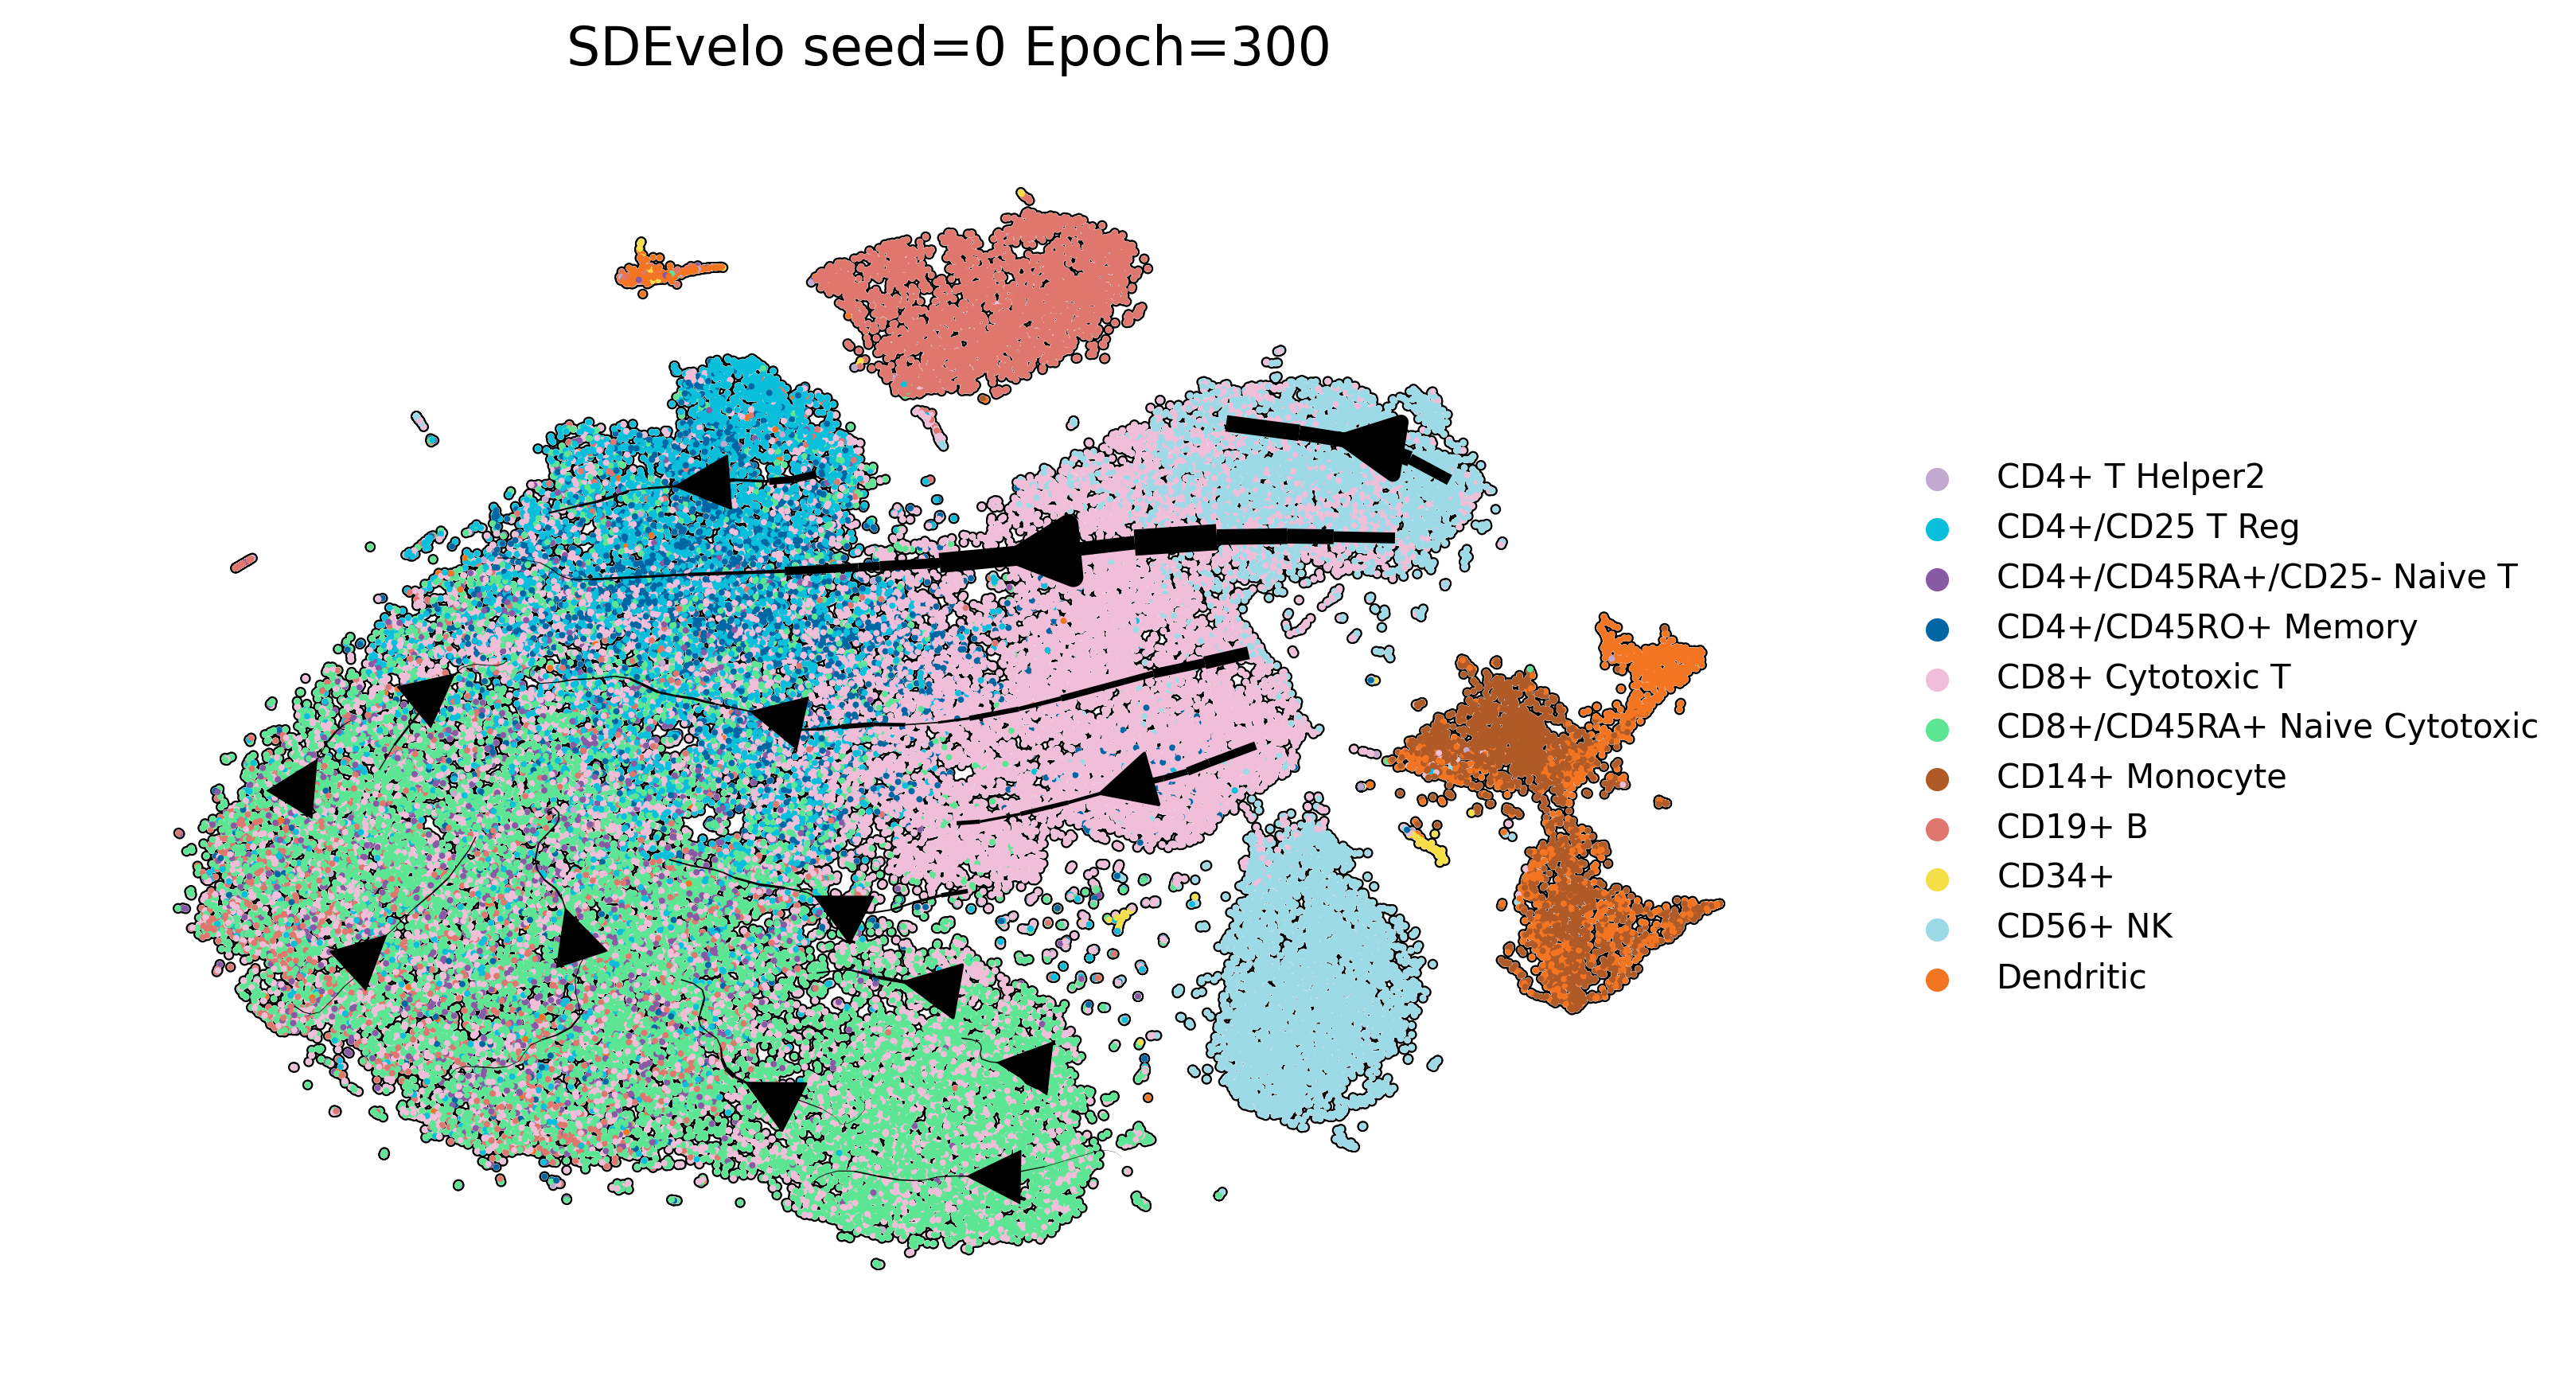

In [3]:
celltype_colors = {
    'CD8+ Cytotoxic T': "#F0BED8", 'CD8+/CD45RA+ Naive Cytotoxic': "#5CE693",
    'CD4+/CD45RO+ Memory': "#0067a4", 'CD19+ B': "#E0776F",
    'CD4+/CD25 T Reg': "#0abfdb", 'CD56+ NK': "#9ddae7",
    'CD4+ T Helper2': "#c2a9d1", 'CD4+/CD45RA+/CD25- Naive T': "#8859a5",
    'CD34+': "#f5de47", 'Dendritic': "#f37421", 'CD14+ Monocyte': "#b05a28"}
adata.uns['celltype_colors'] = celltype_colors
kwargs = dict(fontsize=16, density=0.4, add_margin=.1, arrow_size=4, linewidth=5, smooth=0.08, alpha=1.0, figsize=(10, 7), add_outline=True)
sv.plot_streamline(adata, args, **kwargs)

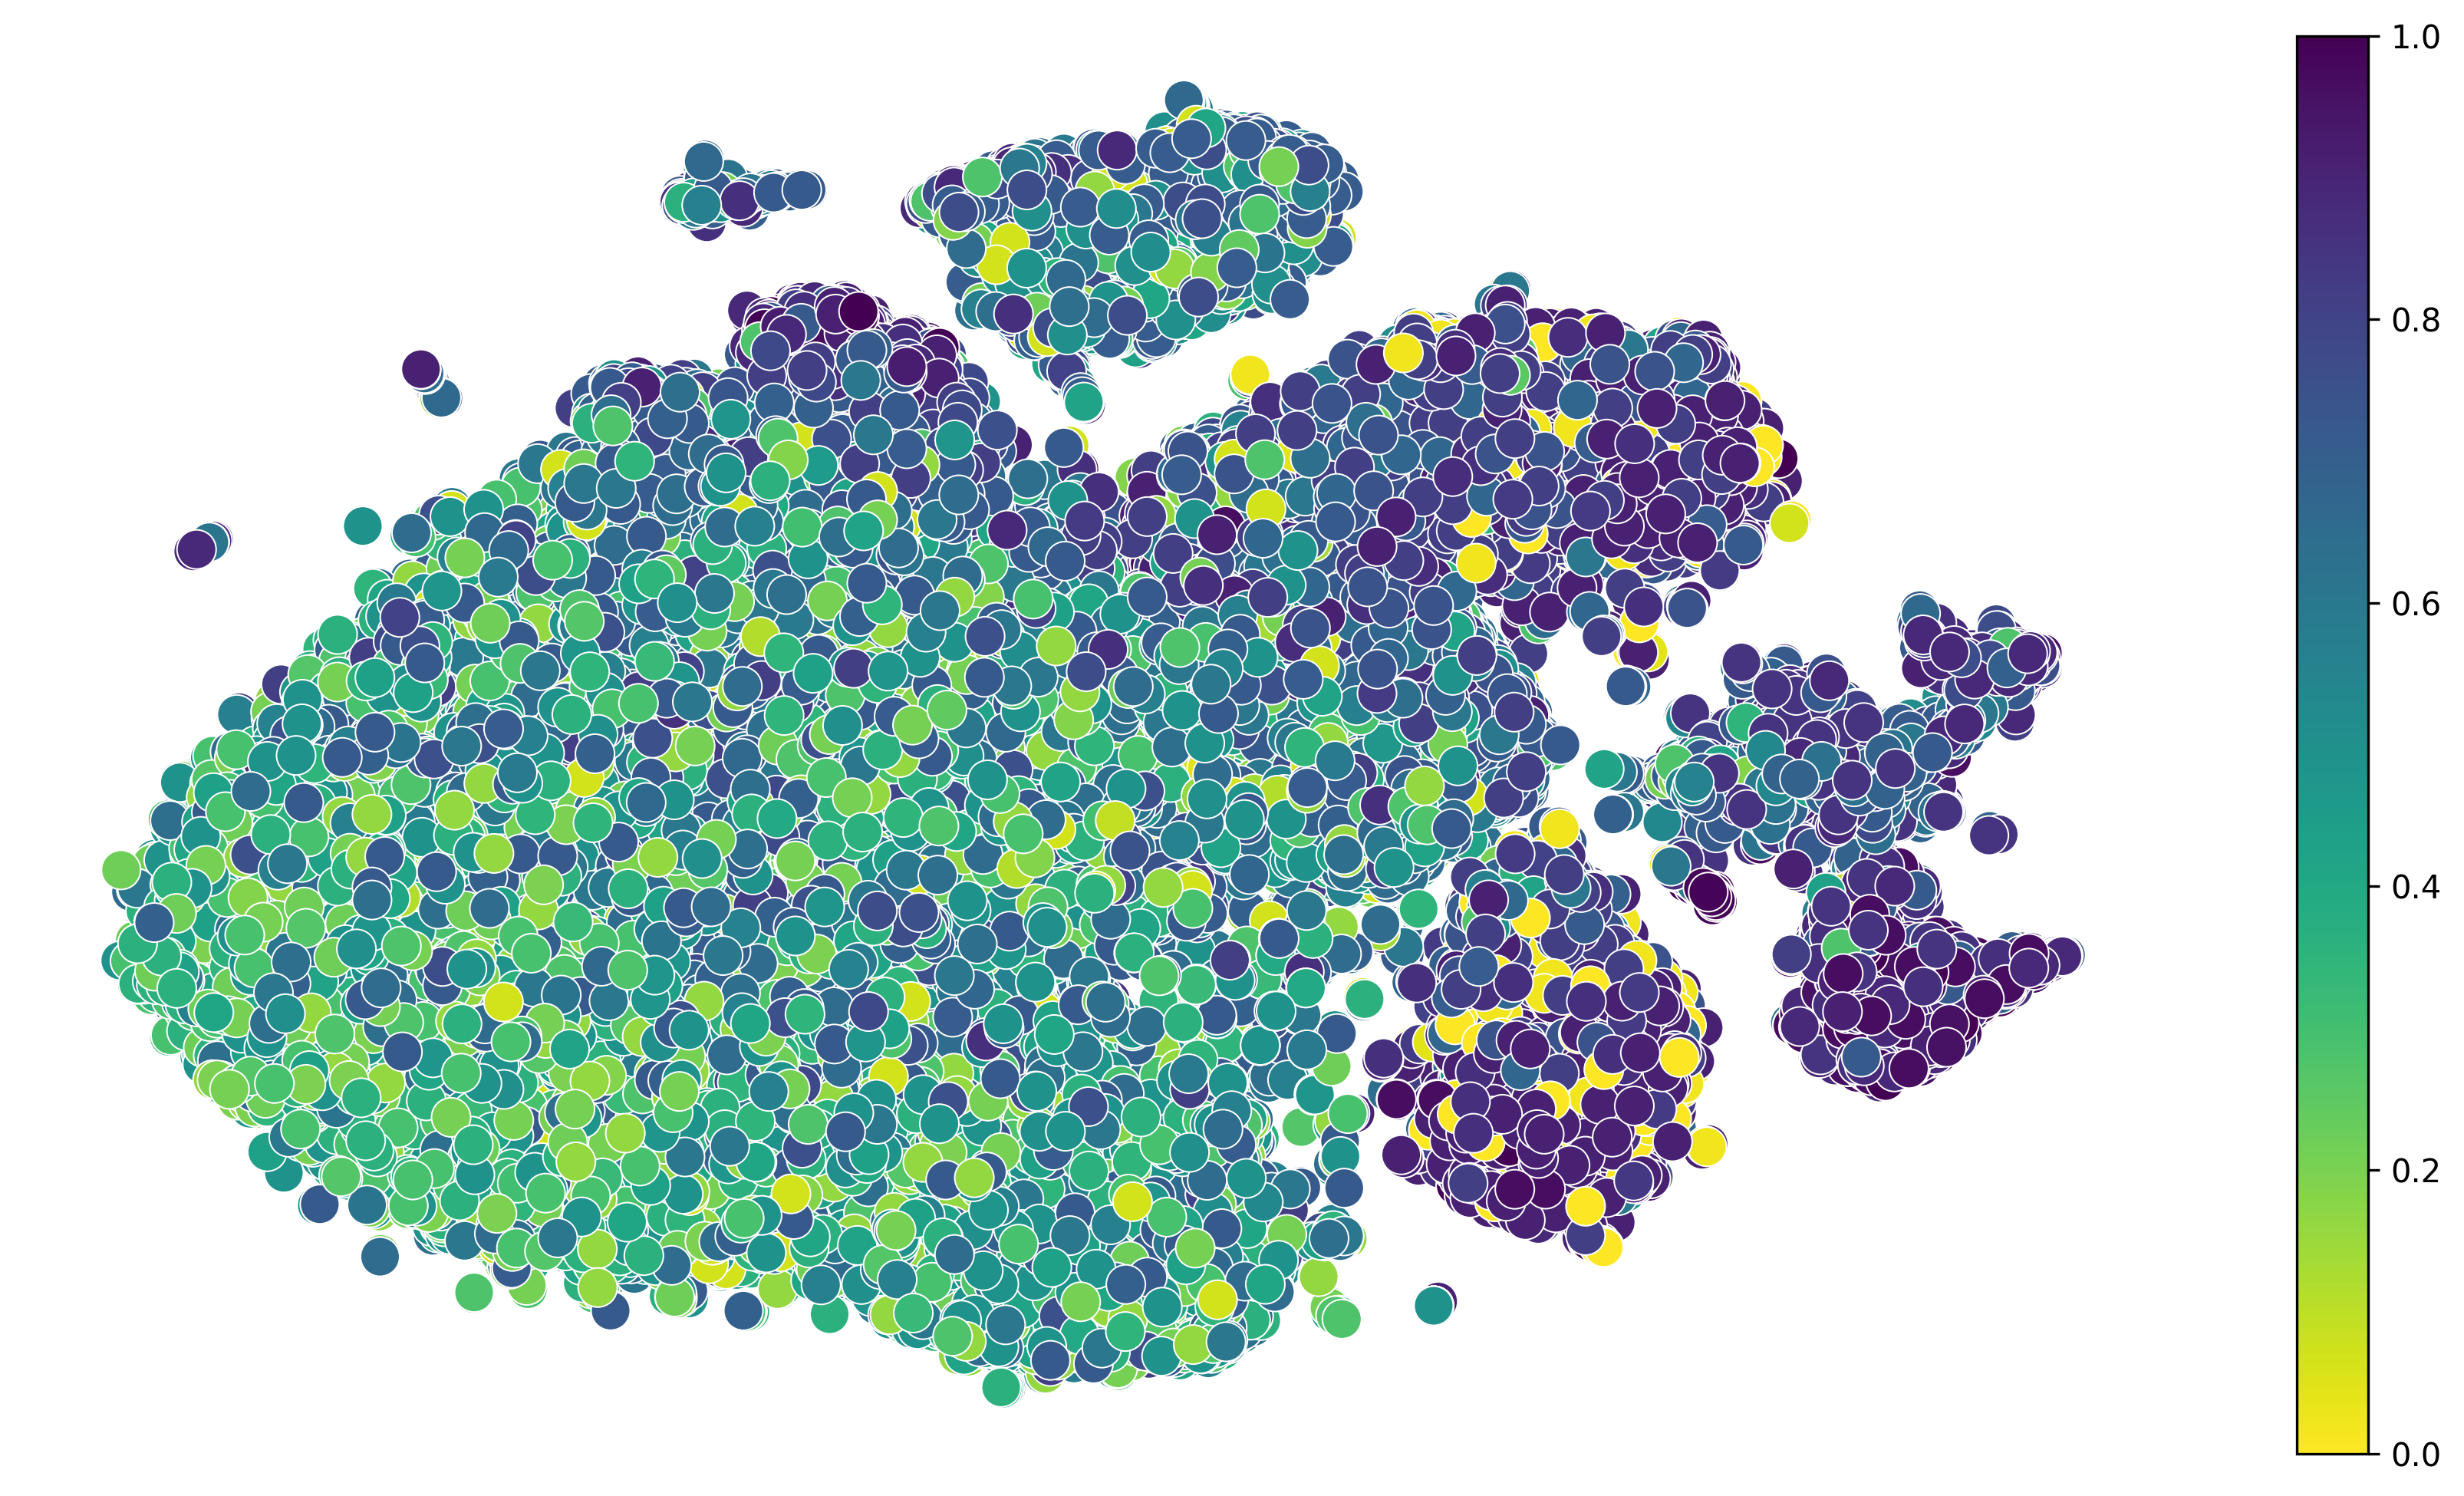

In [4]:
sv.plot_latent_time(adata, args)

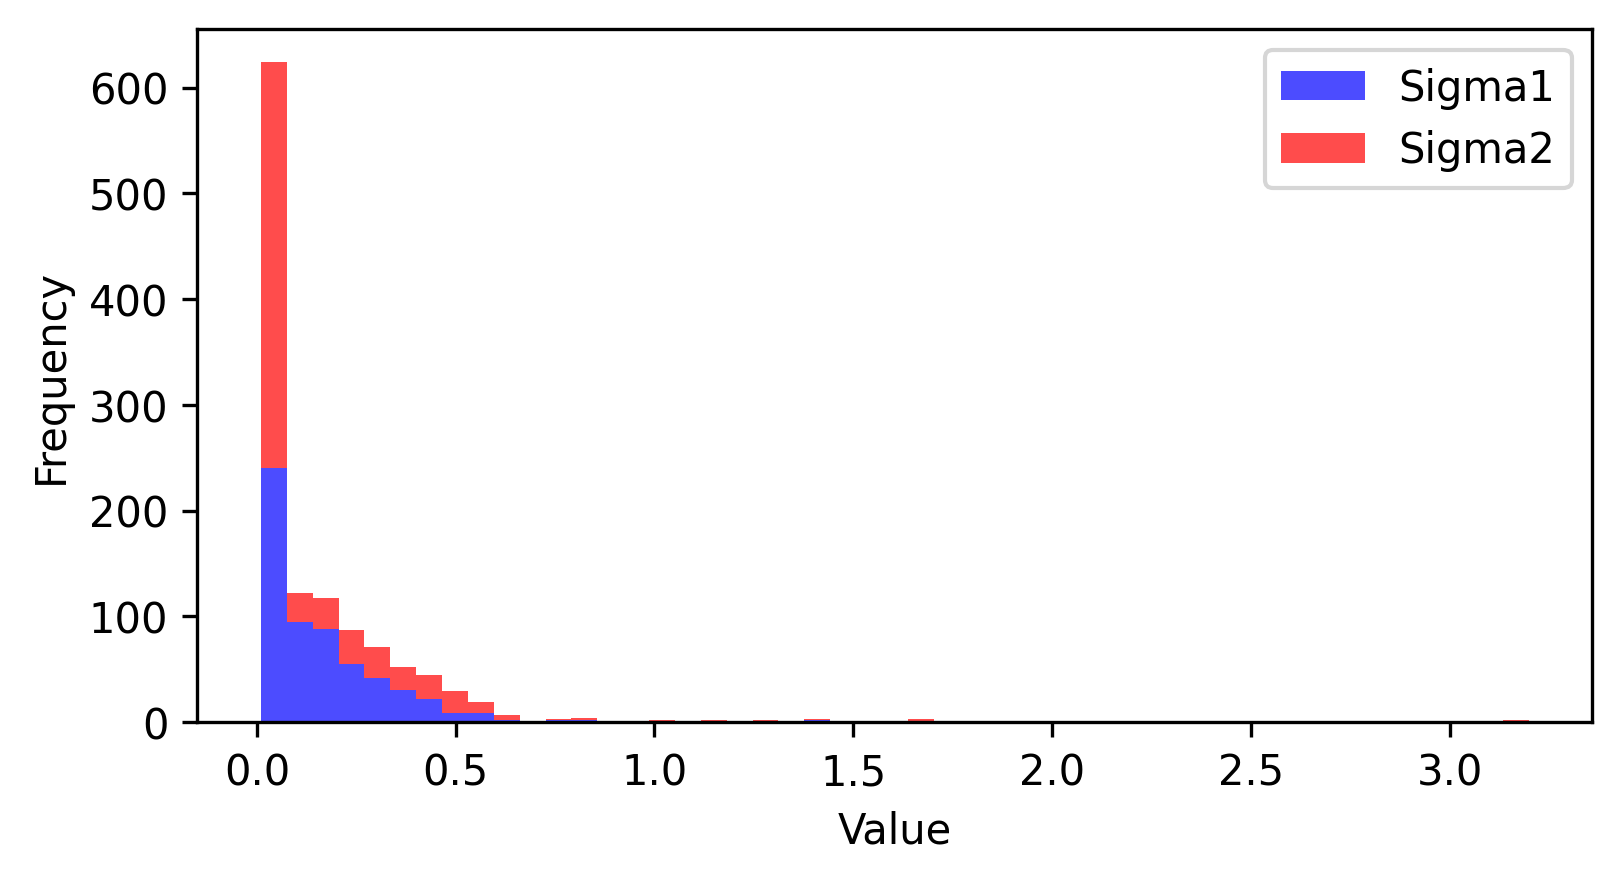

In [5]:
sv.plot_noise_histogram(adata)